# Summary of the dataset

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.


1. id: Unique identifier for each transaction
2. V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
3. Amount: The transaction amount
4. Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)


# Import Libraries & ML Models 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Load Dataset 

In [2]:
df=pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\Campus X data scince _2024\lib practice\CAMPUSX\PROJECTS\creditcard_2023.csv")

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.shape

(568630, 31)

# Assessment of the data 

In [6]:
df.duplicated().sum()   # No duplicate rows found

0

In [7]:
df.isnull().sum()   # No Missing values found in the features

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [9]:
df=df.drop(['id'],axis=1)  # Dropping Id column

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
num_col_1=num_col.columns.to_list()
num_col_1

In [12]:
df_col=df.columns.to_list()
df_col

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

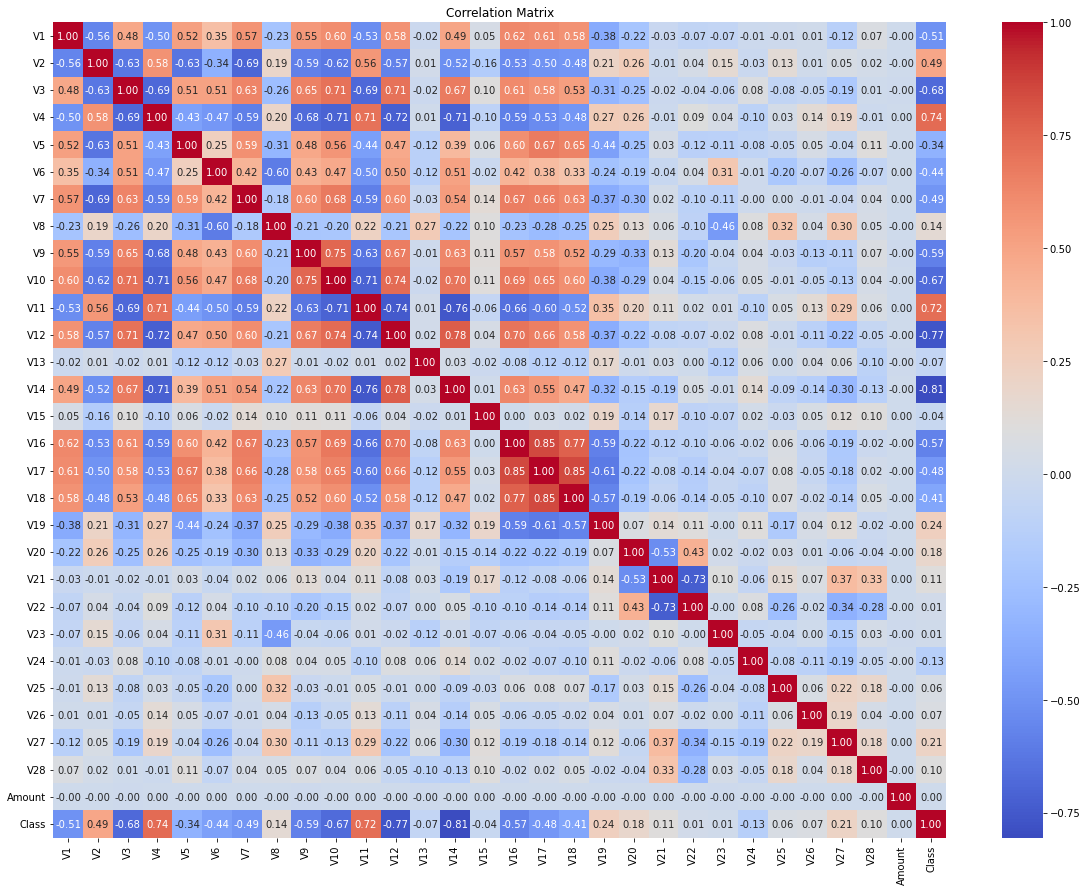

In [16]:
corr = df[df_col].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Univariate Analysis 

Analysis of Numerical features using KDE plot

V1


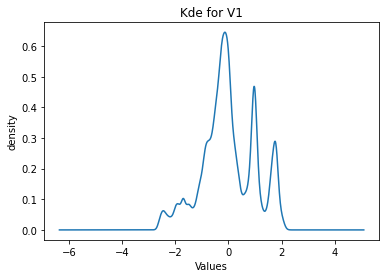

V2


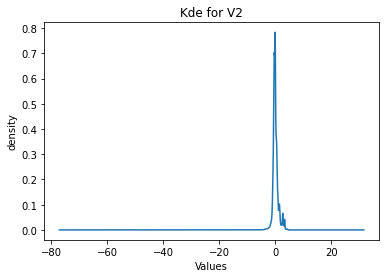

V3


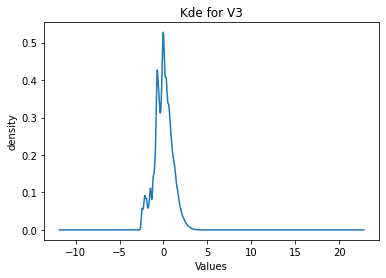

V4


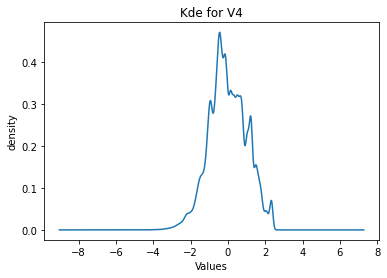

V5


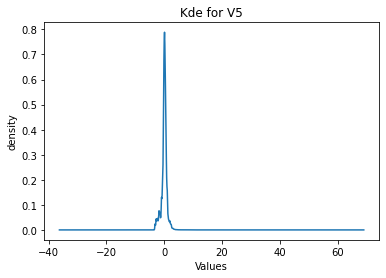

V6


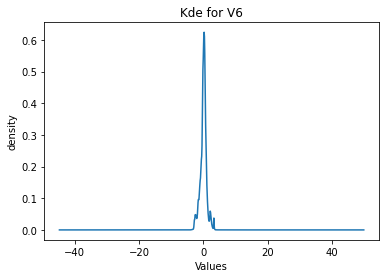

V7


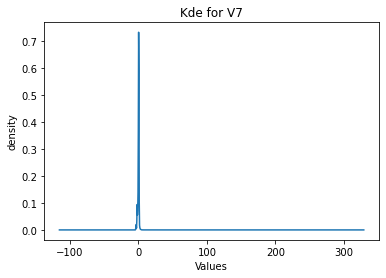

V8


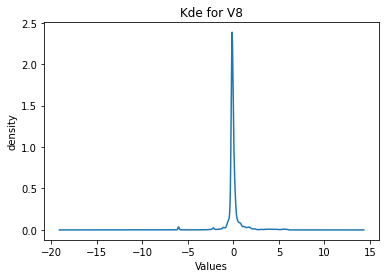

V9


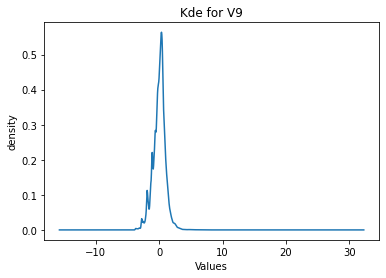

V10


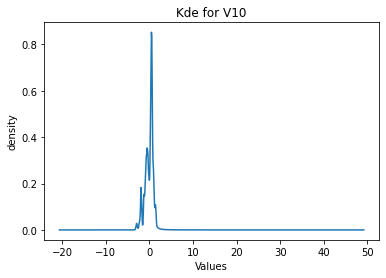

V11


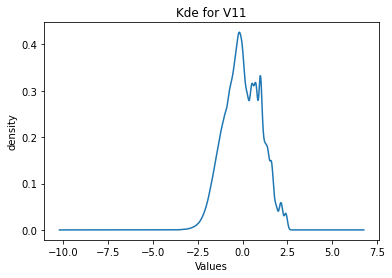

V12


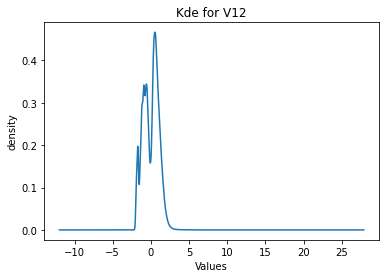

V13


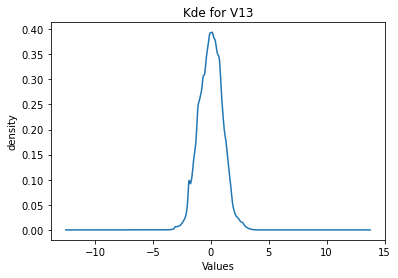

V14


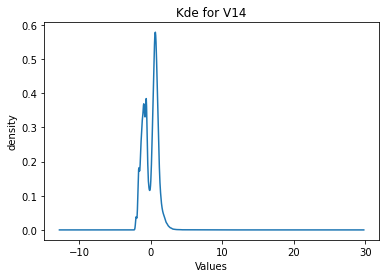

V15


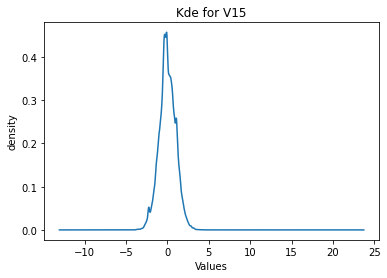

V16


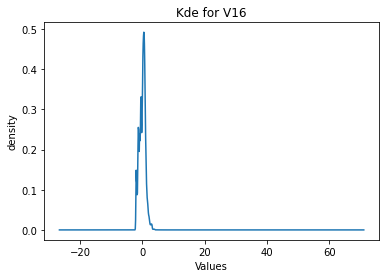

V17


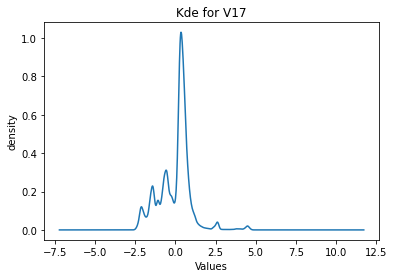

V18


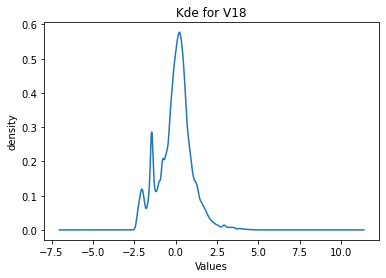

V19


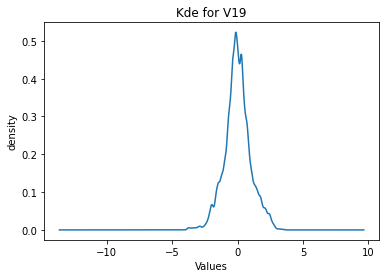

V20


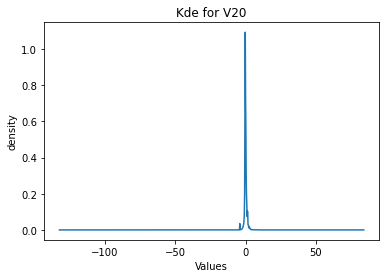

V21


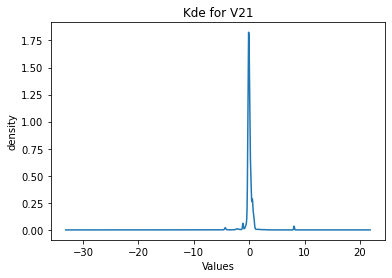

V22


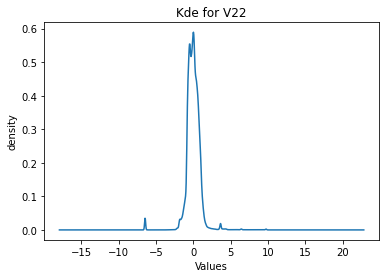

V23


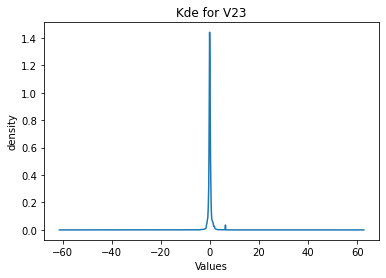

V24


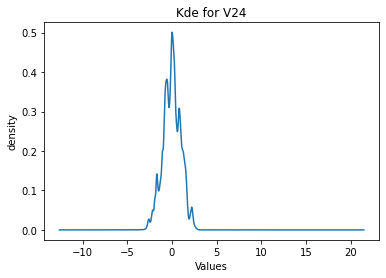

V25


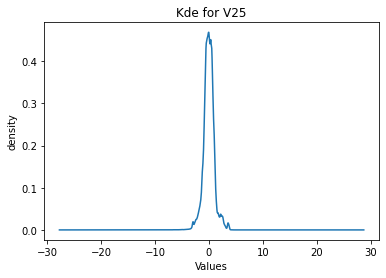

V26


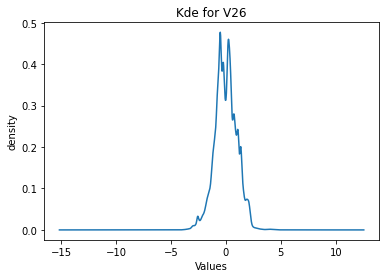

V27


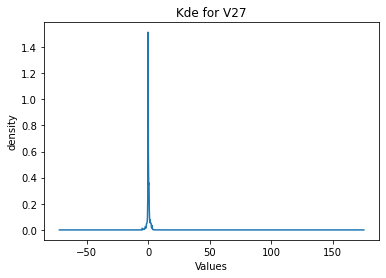

V28


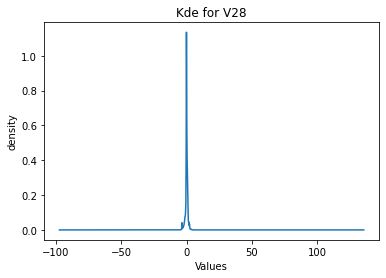

Amount


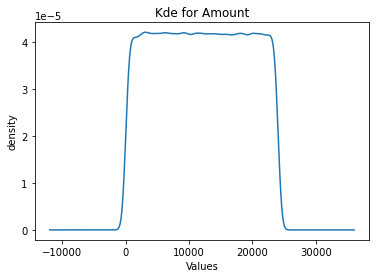

Class


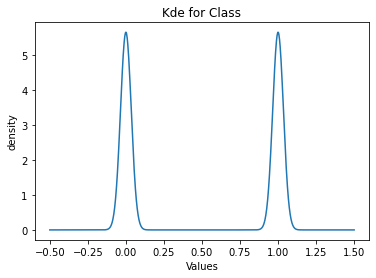

In [17]:
for i in df:
    print(i)
    df[i].plot(kind='kde')
    plt.title(f'Kde for {i}')  
    plt.xlabel('Values')         
    plt.ylabel('density')           
    plt.show() 

In [19]:
m=[]
for i in df:
    print(i,df[i].skew())
    m.append(df[i].skew())
    

V1 -0.08341717301015879
V2 -1.397951923713946
V3 0.014622213363246254
V4 -0.04416892714770696
V5 1.5064136757634041
V6 -0.2016110101307477
V7 19.026866097533325
V8 0.2999722258586845
V9 0.17105746155506976
V10 0.7404135529207346
V11 -0.02089056131978458
V12 0.06675895200237957
V13 0.014906385371884177
V14 0.2078348004501865
V15 0.0112329832827567
V16 0.26640700878187756
V17 0.37306096758486784
V18 0.12919105951072873
V19 -0.010171229833627931
V20 -1.5564597600792378
V21 -0.10898326124277506
V22 0.3185294709245726
V23 -0.0996874579406956
V24 0.06608973847371898
V25 0.023008036822676475
V26 -0.018958738922398494
V27 2.7554523064841256
V28 1.7249777746796184
Amount 0.0016555849611610634
Class 0.0


In [24]:
left_skewed = []
right_skewed = []
normal_dist = []

# Loop through skewness values and bifurcate into categories
for skew in m:
    if skew < -0.5:
        left_skewed.append(skew)  # Left-skewed
    elif skew > 0.5:
        right_skewed.append(skew)  # Right-skewed
    else:
        normal_dist.append(skew)  # Normally distributed

# Output the results
print("Left-Skewed:", left_skewed)
print("Right-Skewed:", right_skewed)
print("Normal Distribution:", normal_dist)


Left-Skewed: [-1.397951923713946, -1.5564597600792378]
Right-Skewed: [1.5064136757634041, 19.026866097533325, 0.7404135529207346, 2.7554523064841256, 1.7249777746796184]
Normal Distribution: [-0.08341717301015879, 0.014622213363246254, -0.04416892714770696, -0.2016110101307477, 0.2999722258586845, 0.17105746155506976, -0.02089056131978458, 0.06675895200237957, 0.014906385371884177, 0.2078348004501865, 0.0112329832827567, 0.26640700878187756, 0.37306096758486784, 0.12919105951072873, -0.010171229833627931, -0.10898326124277506, 0.3185294709245726, -0.0996874579406956, 0.06608973847371898, 0.023008036822676475, -0.018958738922398494, 0.0016555849611610634, 0.0]


Observations

In [25]:
# V2,V20 columns are left Skew distribution
# V5,V7, V10,V27,and V28 are right skew distribution
# Rest other columns are near normal dist

Numerical Analysis using Box plot

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


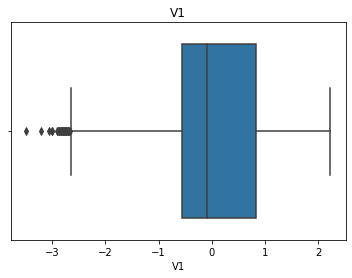

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


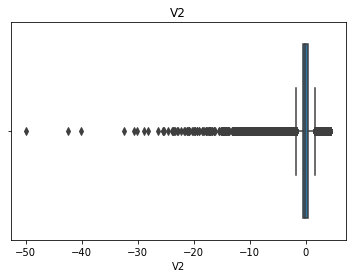

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


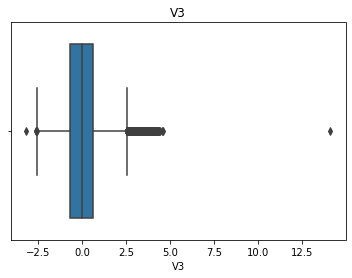

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


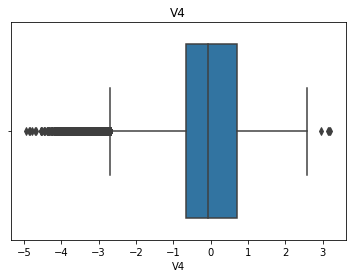

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


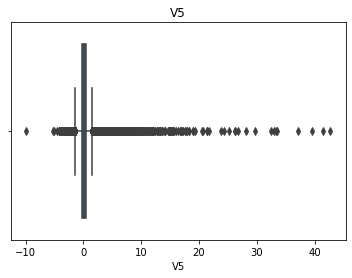

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


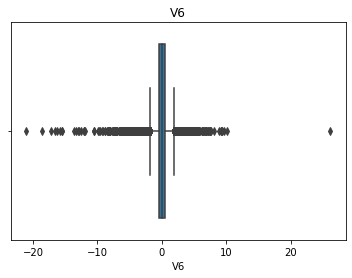

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


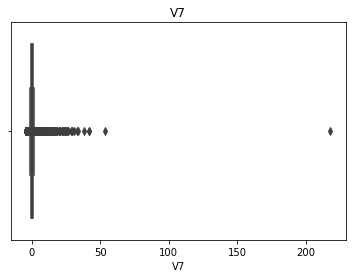

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


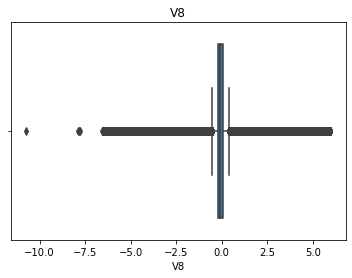

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


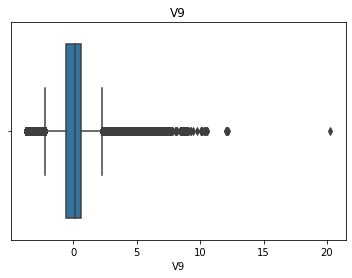

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


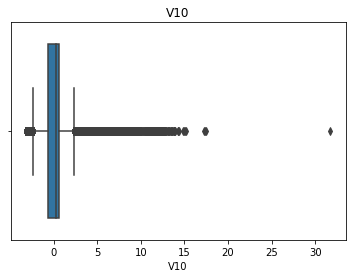

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


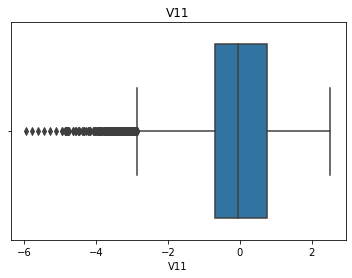

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


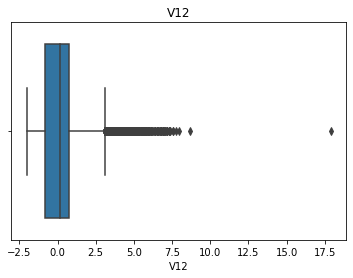

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


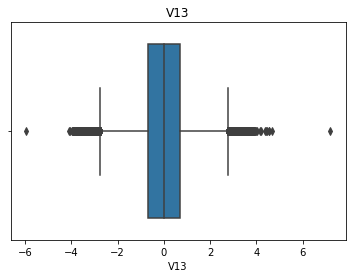

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


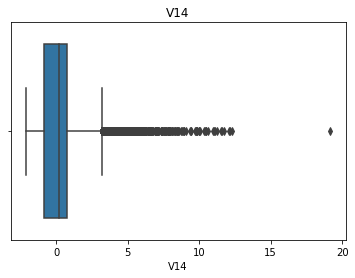

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


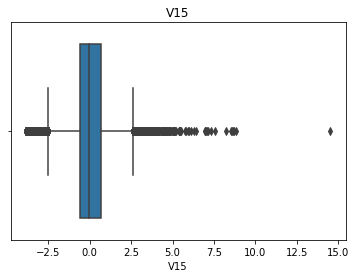

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


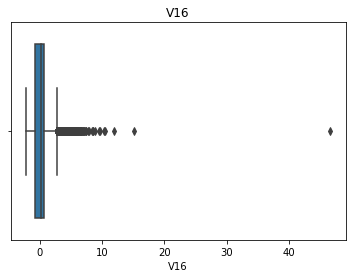

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


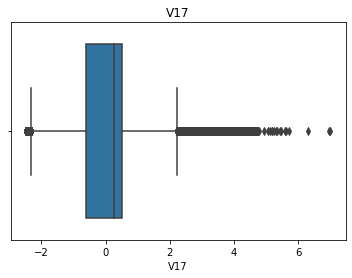

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


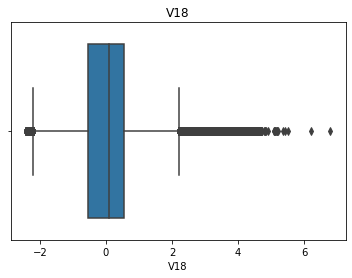

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


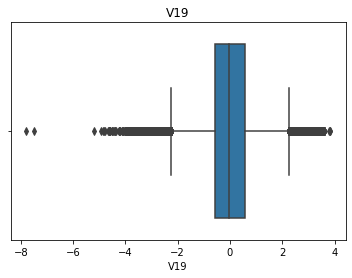

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


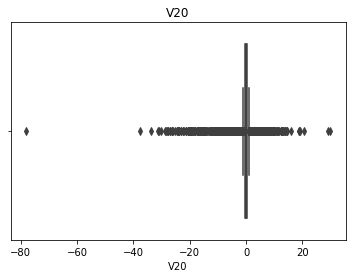

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


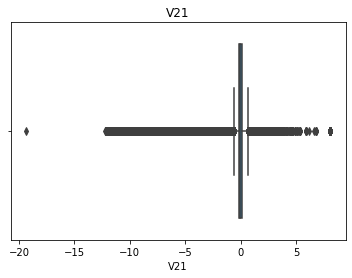

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


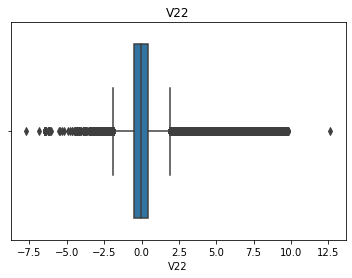

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


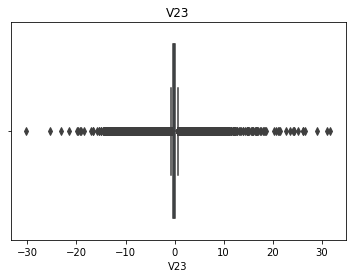

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


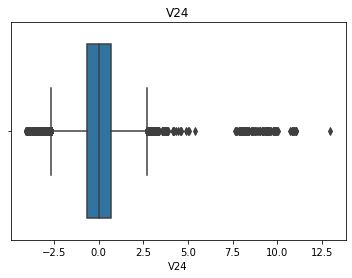

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


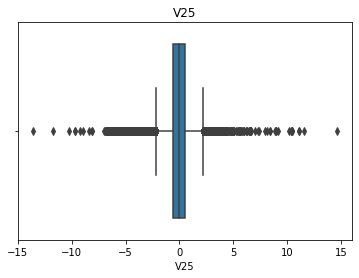

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


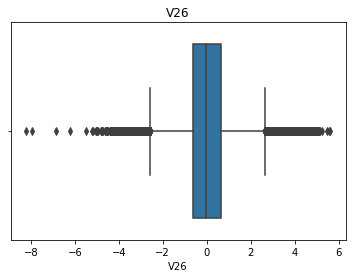

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


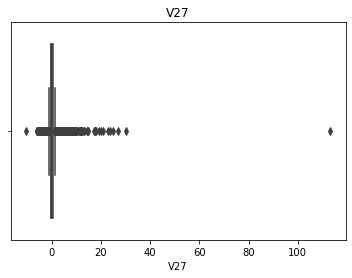

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


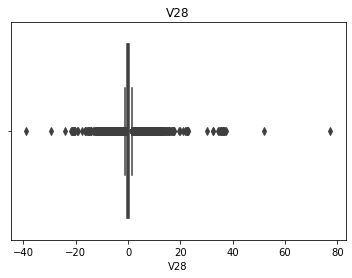

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


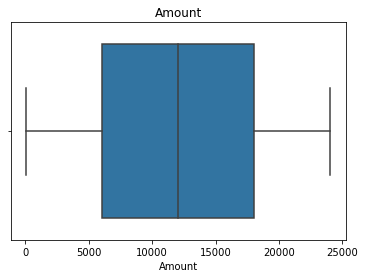

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


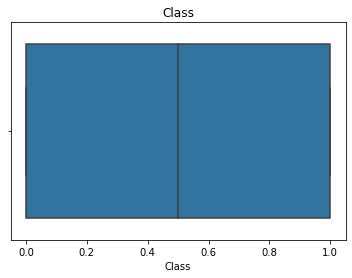

In [26]:
for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

# Splitting dataset into X & y 

In [99]:
X=df.drop(columns='Class')
y=df['Class']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)

In [101]:
# V2,V20 columns are left Skew distribution
# V5,V7, V10,V27,and V28 are right skew distribution
# Rest other columns are near normal dist

# Transforming right skew features into normal  using yeo johnson method

In [102]:
from sklearn.preprocessing import PowerTransformer

columns_to_transform = ['V5', 'V7', 'V10', 'V27', 'V28']

# Initialize the PowerTransformer with the Yeo-Johnson method
yeo_transformer = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the selected columns
for col in columns_to_transform:
    # Fit and transform the column
    X_train[f'{col}_new'] = yeo_transformer.fit_transform(X_train[[col]])


In [104]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,V5_new,V7_new,V10_new,V27_new,V28_new
71044,1.048050,-0.349527,0.341835,-0.311759,0.540016,0.660776,0.500879,-0.165427,0.462031,0.573199,...,1.311477,-0.502596,-0.202605,-0.081842,18796.99,0.548972,0.515500,0.578867,-0.179750,-0.087898
377877,-0.701719,0.365643,-0.790182,1.284715,1.766345,-1.332284,-0.033034,-0.560420,-1.120817,-0.545266,...,0.645869,1.188396,0.652616,-0.215988,18917.93,1.722485,-0.012633,-0.540809,0.664090,-0.222191
512437,-0.457410,-0.337653,-0.322939,0.250737,-0.716183,0.656895,0.488674,0.036034,-0.581754,-0.515589,...,-0.430038,1.238834,0.203088,0.555262,3600.86,-0.709743,0.503588,-0.510811,0.226562,0.553913
343485,-0.478568,0.155469,0.206749,0.489487,-0.260120,0.496060,-0.463597,-0.532690,-0.088120,-0.446120,...,-0.094603,-0.037644,0.371286,-0.008901,7512.18,-0.244436,-0.450688,-0.440644,0.391605,-0.014751
156170,1.662061,-0.869328,0.925697,-0.833974,-0.282276,0.579444,-0.017360,-0.110268,4.719066,0.102910,...,-0.532342,0.605196,-0.171403,-0.197901,5577.15,-0.266847,0.003109,0.110934,-0.148062,-0.204101


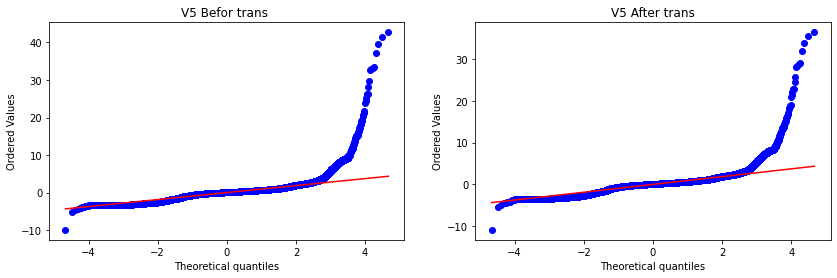

In [107]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V5'], dist="norm", plot=plt)
plt.title('V5 Befor trans ')

plt.subplot(122)
stats.probplot(X_train['V5_new'], dist="norm", plot=plt)
plt.title('V5 After trans')

plt.show()

In [108]:
X_train['V5'].skew()

1.7436214085555295

In [109]:
X_train['V5_new'].skew()

0.9107287312183233

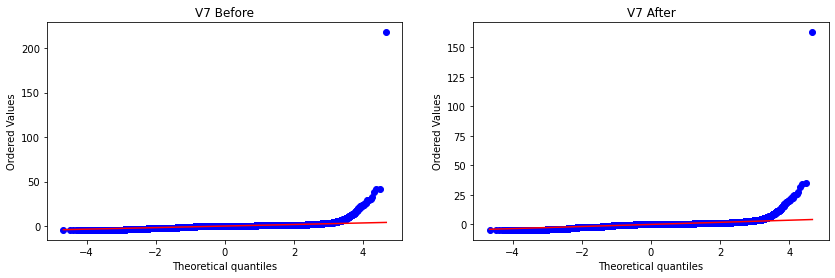

In [110]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V7'], dist="norm", plot=plt)
plt.title('V7 Before')

plt.subplot(122)
stats.probplot(X_train['V7_new'], dist="norm", plot=plt)
plt.title('V7 After')

plt.show()

In [111]:
X_train['V7'].skew()

22.750899732394448

In [112]:
X_train['V7_new'].skew()

9.344066518328203

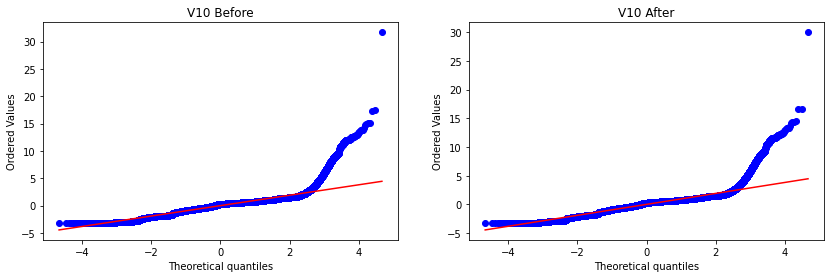

In [113]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V10'], dist="norm", plot=plt)
plt.title('V10 Before')

plt.subplot(122)
stats.probplot(X_train['V10_new'], dist="norm", plot=plt)
plt.title('V10 After')

plt.show()

In [114]:
X_train['V10'].skew()

0.7288742019828637

In [115]:
X_train['V10_new'].skew()

0.5662975626693321

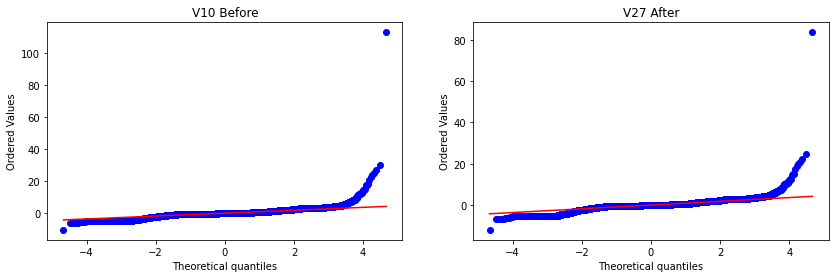

In [116]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V27'], dist="norm", plot=plt)
plt.title('V10 Before')

plt.subplot(122)
stats.probplot(X_train['V27_new'], dist="norm", plot=plt)
plt.title('V27 After')

plt.show()

In [117]:
X_train['V27'].skew()

3.3827109760873872

In [118]:
X_train['V27_new'].skew()

0.8971183789462268

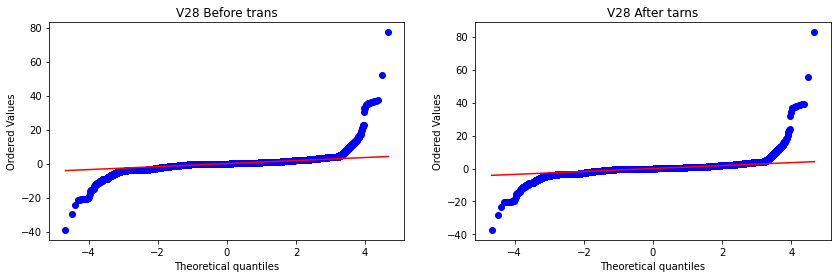

In [120]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V28'], dist="norm", plot=plt)
plt.title('V28 Before trans')

plt.subplot(122)
stats.probplot(X_train['V28_new'], dist="norm", plot=plt)
plt.title('V28 After tarns')

plt.show()

In [121]:
X_train['V28'].skew()

1.7554477580248622

In [122]:
X_train['V28_new'].skew()

2.4836098917663914

# Transforming left skew features into normal using yeo johnson transformation

In [ ]:
# V2,V20 columns are left Skew distribution

In [123]:
columns_to_transform_1 = ['V2', 'V20']

# Initialize the PowerTransformer with the Yeo-Johnson method
yeo_transformer1 = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the selected columns
for col in columns_to_transform_1:
    # Fit and transform the column
    X_train[f'{col}_new'] = yeo_transformer1.fit_transform(X_train[[col]])



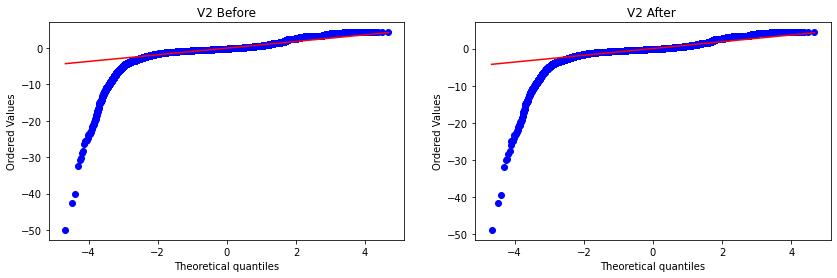

In [124]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V2'], dist="norm", plot=plt)
plt.title('V2 Before')

plt.subplot(122)
stats.probplot(X_train['V2_new'], dist="norm", plot=plt)
plt.title('V2 After ')

plt.show()

In [125]:
X_train['V2'].skew()

-1.6321989171164724

In [126]:
X_train['V2_new'].skew()

-1.5013672627595667

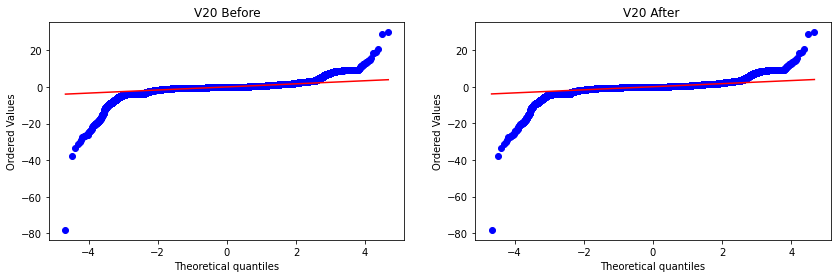

In [127]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['V20'], dist="norm", plot=plt)
plt.title('V20 Before')

plt.subplot(122)
stats.probplot(X_train['V20_new'], dist="norm", plot=plt)
plt.title('V20 After ')

plt.show()

In [128]:
X_train['V20'].skew()

-1.6922715230936736

In [129]:
X_train['V20_new'].skew()

-1.721357650101327

Due to negligible change in V2, V20, and V28 features, let it remains in the original form , so dropping V2_new, V20_new, and V28_new

In [130]:
X_train=X_train.drop(['V2_new','V20_new','V28_new'], axis=1)  

In [131]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,V5_new,V7_new,V10_new,V27_new
71044,1.048050,-0.349527,0.341835,-0.311759,0.540016,0.660776,0.500879,-0.165427,0.462031,0.573199,...,-2.060892,1.311477,-0.502596,-0.202605,-0.081842,18796.99,0.548972,0.515500,0.578867,-0.179750
377877,-0.701719,0.365643,-0.790182,1.284715,1.766345,-1.332284,-0.033034,-0.560420,-1.120817,-0.545266,...,-0.525096,0.645869,1.188396,0.652616,-0.215988,18917.93,1.722485,-0.012633,-0.540809,0.664090
512437,-0.457410,-0.337653,-0.322939,0.250737,-0.716183,0.656895,0.488674,0.036034,-0.581754,-0.515589,...,0.354455,-0.430038,1.238834,0.203088,0.555262,3600.86,-0.709743,0.503588,-0.510811,0.226562
343485,-0.478568,0.155469,0.206749,0.489487,-0.260120,0.496060,-0.463597,-0.532690,-0.088120,-0.446120,...,1.028889,-0.094603,-0.037644,0.371286,-0.008901,7512.18,-0.244436,-0.450688,-0.440644,0.391605
156170,1.662061,-0.869328,0.925697,-0.833974,-0.282276,0.579444,-0.017360,-0.110268,4.719066,0.102910,...,0.107904,-0.532342,0.605196,-0.171403,-0.197901,5577.15,-0.266847,0.003109,0.110934,-0.148062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391226,-0.302459,0.125557,0.130753,0.551264,-0.223293,0.352835,-0.375933,-0.394923,-0.160337,-0.391130,...,0.896497,0.307379,0.058691,0.412750,0.187418,22541.08,-0.207233,-0.360697,-0.385154,0.432031
387349,-0.283691,-0.085208,0.157375,-0.313457,-0.234264,0.519696,0.644895,-0.212996,0.420203,0.078466,...,-0.447044,-1.146303,-1.461194,-0.609943,0.221890,9765.59,-0.218309,0.655577,0.086506,-0.599043
565041,0.202855,-0.426971,0.455537,-0.773743,0.317865,0.891075,0.119722,-0.463841,0.051645,0.582163,...,-1.807817,0.241034,1.278864,-0.290912,0.130650,2908.97,0.331623,0.140105,0.587752,-0.269786
150848,-0.164096,-0.487726,0.164286,-0.393224,2.172028,0.785619,0.548699,-0.106249,0.793148,0.505061,...,-1.624095,0.133922,-0.815836,-0.112265,-0.270357,22610.10,2.103488,0.562108,0.511288,-0.088195


In [132]:
X_train2=X_train.copy()
X_train2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,V5_new,V7_new,V10_new,V27_new
71044,1.048050,-0.349527,0.341835,-0.311759,0.540016,0.660776,0.500879,-0.165427,0.462031,0.573199,...,-2.060892,1.311477,-0.502596,-0.202605,-0.081842,18796.99,0.548972,0.515500,0.578867,-0.179750
377877,-0.701719,0.365643,-0.790182,1.284715,1.766345,-1.332284,-0.033034,-0.560420,-1.120817,-0.545266,...,-0.525096,0.645869,1.188396,0.652616,-0.215988,18917.93,1.722485,-0.012633,-0.540809,0.664090
512437,-0.457410,-0.337653,-0.322939,0.250737,-0.716183,0.656895,0.488674,0.036034,-0.581754,-0.515589,...,0.354455,-0.430038,1.238834,0.203088,0.555262,3600.86,-0.709743,0.503588,-0.510811,0.226562
343485,-0.478568,0.155469,0.206749,0.489487,-0.260120,0.496060,-0.463597,-0.532690,-0.088120,-0.446120,...,1.028889,-0.094603,-0.037644,0.371286,-0.008901,7512.18,-0.244436,-0.450688,-0.440644,0.391605
156170,1.662061,-0.869328,0.925697,-0.833974,-0.282276,0.579444,-0.017360,-0.110268,4.719066,0.102910,...,0.107904,-0.532342,0.605196,-0.171403,-0.197901,5577.15,-0.266847,0.003109,0.110934,-0.148062


In [133]:
X_train2=X_train2.drop(['V5','V7','V10','V27'], axis=1)

In [134]:
X_train2

,V1,V2,V3,V4,V6,V8,V9,V11,V12,V13,...,V23,V24,V25,V26,V28,Amount,V5_new,V7_new,V10_new,V27_new
71044,1.048050,-0.349527,0.341835,-0.311759,0.660776,-0.165427,0.462031,-1.605577,0.799461,1.161573,...,-0.290184,-2.060892,1.311477,-0.502596,-0.081842,18796.99,0.548972,0.515500,0.578867,-0.179750
377877,-0.701719,0.365643,-0.790182,1.284715,-1.332284,-0.560420,-1.120817,0.997261,-0.815971,-0.876386,...,0.940663,-0.525096,0.645869,1.188396,-0.215988,18917.93,1.722485,-0.012633,-0.540809,0.664090
512437,-0.457410,-0.337653,-0.322939,0.250737,0.656895,0.036034,-0.581754,0.299787,-0.582977,0.013479,...,1.654330,0.354455,-0.430038,1.238834,0.555262,3600.86,-0.709743,0.503588,-0.510811,0.226562
343485,-0.478568,0.155469,0.206749,0.489487,0.496060,-0.532690,-0.088120,0.216805,-0.279968,0.856558,...,-0.270483,1.028889,-0.094603,-0.037644,-0.008901,7512.18,-0.244436,-0.450688,-0.440644,0.391605
156170,1.662061,-0.869328,0.925697,-0.833974,0.579444,-0.110268,4.719066,-0.968931,0.083617,2.030746,...,0.122278,0.107904,-0.532342,0.605196,-0.197901,5577.15,-0.266847,0.003109,0.110934,-0.148062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391226,-0.302459,0.125557,0.130753,0.551264,0.352835,-0.394923,-0.160337,0.192972,-0.308114,1.008274,...,-0.246279,0.896497,0.307379,0.058691,0.187418,22541.08,-0.207233,-0.360697,-0.385154,0.432031
387349,-0.283691,-0.085208,0.157375,-0.313457,0.519696,-0.212996,0.420203,-0.167832,-0.211981,-0.317209,...,0.309073,-0.447044,-1.146303,-1.461194,0.221890,9765.59,-0.218309,0.655577,0.086506,-0.599043
565041,0.202855,-0.426971,0.455537,-0.773743,0.891075,-0.463841,0.051645,-0.458808,0.611532,0.131983,...,-0.219158,-1.807817,0.241034,1.278864,0.130650,2908.97,0.331623,0.140105,0.587752,-0.269786
150848,-0.164096,-0.487726,0.164286,-0.393224,0.785619,-0.106249,0.793148,0.101022,-0.350016,0.180570,...,-0.495726,-1.624095,0.133922,-0.815836,-0.270357,22610.10,2.103488,0.562108,0.511288,-0.088195


In [135]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
400676,-0.462969,0.406789,-0.639432,0.283406,-0.214320,0.201997,-0.123074,0.306774,-0.184175,-0.773467,...,-0.159944,0.172351,0.781588,-0.046417,0.627347,-0.171191,-0.940173,0.498851,0.335096,8238.17
250074,1.734849,-0.438777,0.214386,-0.360403,0.067264,-0.591304,0.521635,-0.246796,0.742282,0.621359,...,-0.382891,-0.193860,-0.473427,0.436873,2.095498,-0.713107,0.323922,-0.311653,-0.219819,23126.99
177845,-0.750679,-1.067930,-0.054600,-0.494649,0.006187,-0.194344,0.601390,-0.060673,1.129621,0.519193,...,-2.569378,-0.420327,-0.108994,2.450488,0.222055,-2.999838,-0.377448,-0.114645,-0.304743,534.89
158385,1.844165,-0.427507,-0.002742,-0.480834,0.410013,0.042083,0.447113,-0.226865,2.127043,0.420322,...,-0.459147,-0.066827,0.572121,-0.028625,0.903209,0.502254,-1.167893,-0.267307,-0.237996,2125.34
289871,0.894165,-0.142900,0.365438,0.344118,0.418478,0.294199,0.442574,-0.111165,-0.003137,0.518454,...,-0.342226,-0.107116,-0.092198,-0.079416,0.000152,0.584086,0.184205,-0.206062,0.052719,23161.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344710,-1.835054,1.631170,-2.071292,2.354161,-1.591972,-0.989400,-2.049215,-0.072500,-1.931533,-1.922563,...,0.814160,-1.135505,1.017657,1.120936,-1.691325,-0.420265,1.347548,3.071722,-3.534077,19496.06
526037,0.241341,0.271837,-0.556460,0.589676,0.053751,-0.368974,-0.279181,0.017766,-0.336686,-0.841756,...,0.401782,0.013049,-0.695924,-0.274999,-1.365594,1.456898,-0.434650,0.897619,1.014175,4443.86
434212,-0.309388,-0.345136,-0.577998,0.546361,-0.015096,-0.028347,-0.304684,0.135635,-0.323119,-0.325836,...,-0.011914,0.213047,0.970531,0.764248,0.617142,-1.516453,-1.102668,0.615442,-0.054908,9526.32
487626,0.863785,0.392026,-0.507378,0.871017,1.912697,-0.794776,1.137978,-0.288275,-0.654677,-0.067267,...,-0.177651,-0.216305,-0.410321,-0.615560,-0.960069,2.210560,1.142727,-0.214762,0.340852,22925.19


In [137]:
columns_to_transform = ['V5', 'V7', 'V10', 'V27']

# Initialize the PowerTransformer with the Yeo-Johnson method
yeo_transformer = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the selected columns
for col in columns_to_transform:
    # Fit and transform the column
    X_test[f'{col}_new'] = yeo_transformer.fit_transform(X_test[[col]])


In [138]:
X_test=X_test.drop(['V5','V7','V10','V27'], axis=1)

In [139]:
X_test

,V1,V2,V3,V4,V6,V8,V9,V11,V12,V13,...,V23,V24,V25,V26,V28,Amount,V5_new,V7_new,V10_new,V27_new
400676,-0.462969,0.406789,-0.639432,0.283406,0.201997,0.306774,-0.184175,0.606343,-0.453830,-0.209871,...,-0.046417,0.627347,-0.171191,-0.940173,0.335096,8238.17,-0.221917,-0.148981,-0.772843,0.511640
250074,1.734849,-0.438777,0.214386,-0.360403,-0.591304,-0.246796,0.742282,-0.511204,1.562580,0.615079,...,0.436873,2.095498,-0.713107,0.323922,-0.219819,23126.99,0.065979,0.530442,0.623691,-0.307669
177845,-0.750679,-1.067930,-0.054600,-0.494649,-0.194344,-0.060673,1.129621,-1.642899,1.414959,0.979469,...,2.450488,0.222055,-2.999838,-0.377448,-0.304743,534.89,0.003437,0.615936,0.523079,-0.106685
158385,1.844165,-0.427507,-0.002742,-0.480834,0.042083,-0.226865,2.127043,-0.676332,-0.299080,1.459443,...,-0.028625,0.903209,0.502254,-1.167893,-0.237996,2125.34,0.417862,0.450808,0.425502,-0.262332
289871,0.894165,-0.142900,0.365438,0.344118,0.294199,-0.111165,-0.003137,0.319625,0.457616,-1.162054,...,-0.079416,0.000152,0.584086,0.184205,0.052719,23161.92,0.426569,0.445966,0.522350,-0.199809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344710,-1.835054,1.631170,-2.071292,2.354161,-0.989400,-0.072500,-1.931533,2.166519,-1.727837,0.780194,...,1.120936,-1.691325,-0.420265,1.347548,-3.534077,19496.06,-1.618997,-2.072537,-1.952976,3.033499
526037,0.241341,0.271837,-0.556460,0.589676,-0.368974,0.017766,-0.336686,0.672636,-0.795367,0.226676,...,-0.274999,-1.365594,1.456898,-0.434650,1.014175,4443.86,0.052137,-0.309920,-0.842407,0.908629
434212,-0.309388,-0.345136,-0.577998,0.546361,-0.028347,0.135635,-0.323119,0.592300,-0.417595,0.994750,...,0.764248,0.617142,-1.516453,-1.102668,-0.054908,9526.32,-0.018344,-0.336093,-0.319178,0.628045
487626,0.863785,0.392026,-0.507378,0.871017,-0.794776,-0.288275,-0.654677,0.224579,-0.278970,-1.639690,...,-0.615560,-0.960069,2.210560,1.142727,0.340852,22925.19,1.972943,1.197497,-0.059298,-0.208684


# Standardization of features

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
sc=StandardScaler()

In [142]:
sc.fit(X_train2)

X_train_scaled=sc.transform(X_train2)
X_test_scaled=sc.transform(X_test)

In [143]:
X_train_scaled

array([[ 1.04826946e+00, -3.48483151e-01,  3.42099436e-01, ...,
         5.15500084e-01,  5.78866622e-01, -1.79749674e-01],
       [-7.01086014e-01,  3.63772328e-01, -7.89697337e-01, ...,
        -1.26326151e-02, -5.40808791e-01,  6.64090247e-01],
       [-4.56834723e-01, -3.36658192e-01, -3.22545345e-01, ...,
         5.03587858e-01, -5.10811105e-01,  2.26562021e-01],
       ...,
       [ 2.03274711e-01, -4.25612344e-01,  4.55779058e-01, ...,
         1.40104513e-01,  5.87751788e-01, -2.69785608e-01],
       [-1.63589983e-01, -4.86119517e-01,  1.64584934e-01, ...,
         5.62108155e-01,  5.11288220e-01, -8.81946110e-02],
       [ 1.93591660e-02,  2.23676451e-06,  6.10386331e-01, ...,
         4.44580266e-01,  1.48208234e+00,  9.30155818e-02]])

In [144]:
X_test_scaled

array([[-0.46239241,  0.40475059, -0.63897675, ..., -0.14898143,
        -0.77284311,  0.51163968],
       [ 1.73490698, -0.43736964,  0.21467498, ...,  0.53044215,
         0.62369123, -0.30766859],
       [-0.75003412, -1.06395897, -0.05425821, ...,  0.61593608,
         0.52307901, -0.1066852 ],
       ...,
       [-0.3088478 , -0.34411081, -0.57755536, ..., -0.33609261,
        -0.31917781,  0.62804515],
       [ 0.86404821,  0.39004743, -0.50694815, ...,  1.19749704,
        -0.05929837, -0.20868415],
       [ 0.13620121, -0.19456557,  0.69970428, ...,  0.68339735,
         0.67539265, -0.45846203]])

In [145]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix, roc_auc_score

# Assessing Result with multiple ML models 

LogisticRegression
----------


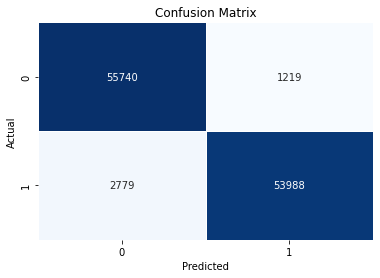

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56959
           1       0.98      0.95      0.96     56767

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Decision Tree Classifier
----------


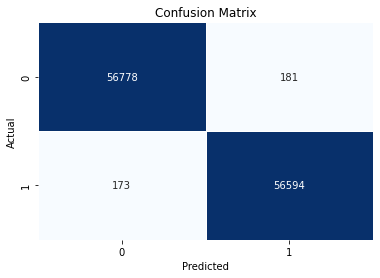

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56959
           1       1.00      1.00      1.00     56767

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



C:\Users\mohit\anaconda3a\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors
----------


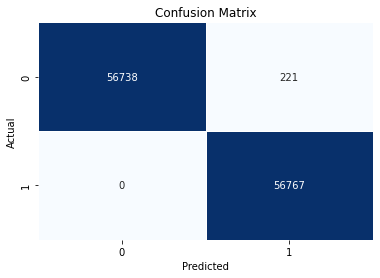

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56959
           1       1.00      1.00      1.00     56767

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest
----------


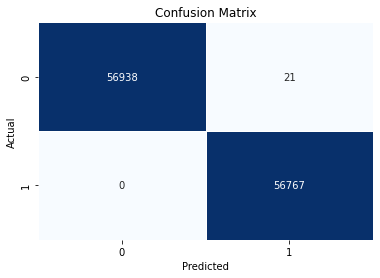

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56959
           1       1.00      1.00      1.00     56767

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

GB
----------


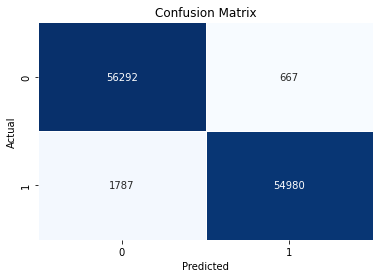

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56959
           1       0.99      0.97      0.98     56767

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



,Model,Accuracy Score,Precision,Recall,F1 Score,ROC-AUC
0,LogisticRegression,96.48%,97.79%,95.1%,96.43%,99.37%
1,Decision Tree Classifier,99.69%,99.68%,99.7%,99.69%,99.69%
2,K-Nearest Neighbors,99.81%,99.61%,100.0%,99.81%,99.93%
3,Random Forest,99.98%,99.96%,100.0%,99.98%,100.0%
4,GB,97.84%,98.8%,96.85%,97.82%,99.86%


In [146]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best',random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=57),
    'GB': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    print(model_name)
    print("-"*10)
    
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test, y_pred_prob) * 100, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%"
    })

results_df = pd.DataFrame(results)
display(results_df)

In [ ]:
#From above we can conclude that Random forest is the best model among mentioned other models 